In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


PATH = "../data/UCI_Credit_Card.csv"
df = pd.read_csv(PATH, sep=";")

if df.shape[1] == 1:
    col = df.columns[0]
    data = df[col].astype(str).str.split(",", expand=True)

    header = [h.strip().strip('"') for h in col.split(",")]
    data.columns = header

    df = data
df = df.apply(pd.to_numeric, errors="raise")

print(df.dtypes.head(10))
print("target unique:", df["default.payment.next.month"].unique()[:10])
print("shape:", df.shape)


ID             int64
LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
dtype: object
target unique: [1 0]
shape: (30000, 25)


In [2]:
print("shape:", df.shape)
display(df.info())

missing = df.isna().mean().sort_values(ascending=False)
display(missing.head(10))

shape: (30000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2   

None

ID           0.0
LIMIT_BAL    0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
PAY_0        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
dtype: float64

Default rate: 0.2212


default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

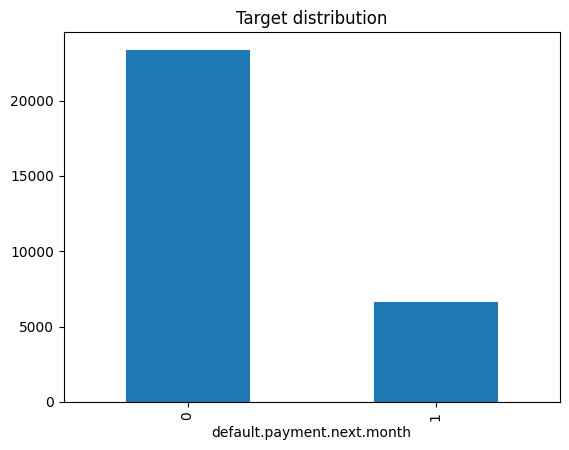

In [3]:
TARGET = "default.payment.next.month"

rate = df[TARGET].mean()
print("Default rate:", rate)

counts = df[TARGET].value_counts()
display(counts)

counts.plot(kind="bar")
plt.title("Target distribution")
plt.show()

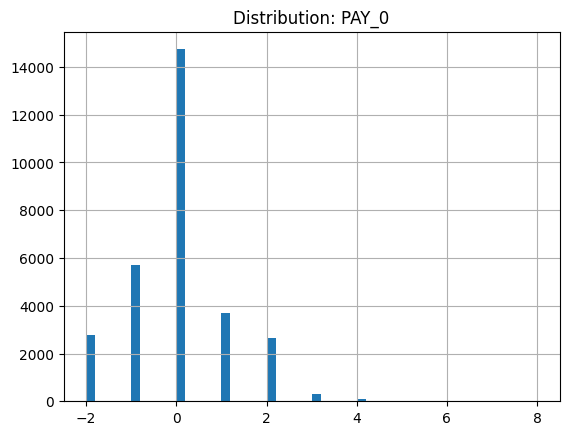

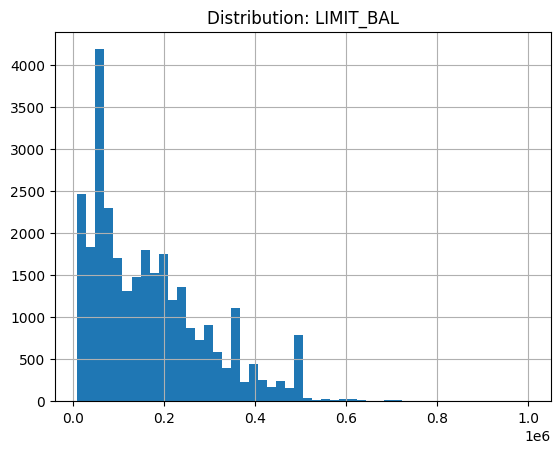

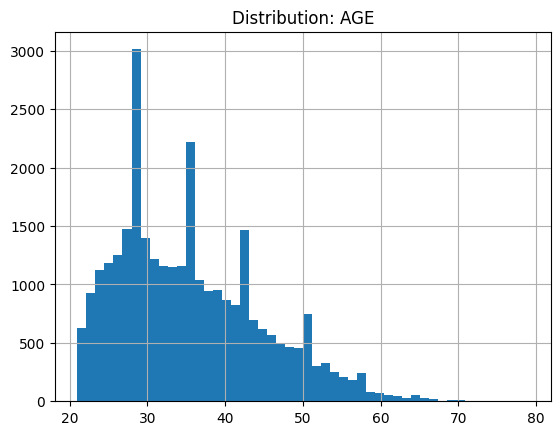

In [4]:
for col in ["PAY_0", "LIMIT_BAL", "AGE"]:
    plt.figure()
    df[col].hist(bins=50)
    plt.title(f"Distribution: {col}")
    plt.show()

,LIMIT_BAL,AGE,PAY_0
default.payment.next.month,,,
0,178099.726074,35.417266,-0.211222
1,130109.656420,35.725738,0.668174


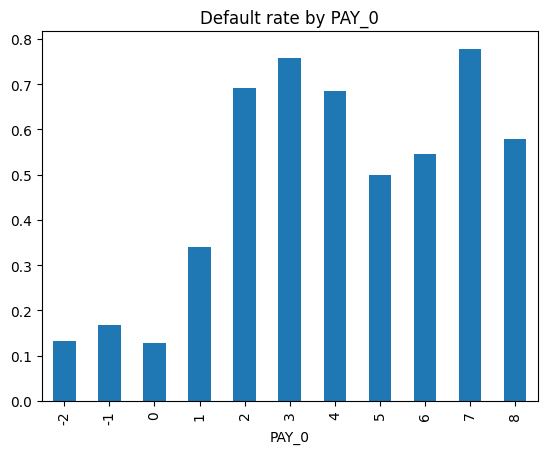

In [6]:
group_stats = df.groupby(TARGET)[["LIMIT_BAL", "AGE", "PAY_0"]].mean()
display(group_stats)

default_by_pay0 = df.groupby("PAY_0")[TARGET].mean().sort_index()
plt.figure()
default_by_pay0.plot(kind="bar")
plt.title("Default rate by PAY_0")
plt.show()

Дисбаланс классов умеренный (дефолтов ~22%, недефолтов ~78%)

AGE концентрируется примерно в диапазоне 20-50

Пропусков нет
